# Importing the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
training_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train = np.array(training_data, dtype=np.float32)
np.random.seed(42)
np.random.shuffle(train)

In [ ]:
Y = train[:,0]
X = train[:,1:]

X_test = np.array(test_data)

### Inspecting the data

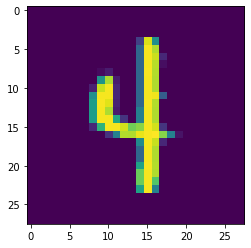

In [ ]:
plt.imshow(np.array(X[2500]).reshape((28,28)))

In [ ]:
Y = tf.one_hot(Y, 10)

X = X/255.0

(42000, 784)


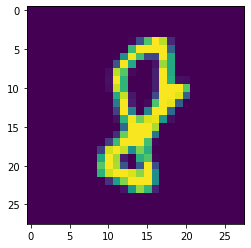

In [ ]:
x_train, x_val = (X[:29400, :], X[29400:, :])
y_train, y_val = (Y[:29400, :], Y[29400:, :])

print(x_train.shape)
plt.imshow(x_train[0].reshape(28,28))

In [ ]:
x_train = x_train.reshape(29400, 28, 28, 1)
x_val = x_val.reshape(12600,28,28,1)

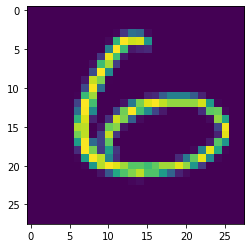

In [ ]:
plt.imshow(x_train[10,:,:,0])

# Deep Network - Implementation

In [ ]:
def mnist_model():
    model = tf.keras.Sequential([
        tfl.ZeroPadding2D(padding=(2), input_shape=(28, 28, 1)),
        tfl.Conv2D(6, 5, strides=1),
        tfl.MaxPool2D(2, strides=2),
        tfl.Conv2D(16, 5, strides=1),
        tfl.MaxPool2D(2, strides=2),
        tfl.Flatten(),
        tfl.Dense(120, activation='relu'),
        tfl.Dense(84, activation='relu'),
        tfl.Dense(10, activation='softmax')
    ])

    return model

In [ ]:
mnist_model = mnist_model()

In [ ]:
mnist_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 32, 32, 1)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                        

In [ ]:
history = mnist_model.fit(x_train, y_train, epochs=12, batch_size=64, validation_data=tf.data.Dataset.from_tensor_slices((x_val, y_val)).batch(64))

Epoch 1/10
657/657 [==============================] - 24s 35ms/step - loss: 0.2741 - accuracy: 0.9193
Epoch 2/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0767 - accuracy: 0.9767
Epoch 3/10
657/657 [==============================] - 23s 35ms/step - loss: 0.0519 - accuracy: 0.9834
Epoch 4/10
657/657 [==============================] - 25s 39ms/step - loss: 0.0390 - accuracy: 0.9874
Epoch 5/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0298 - accuracy: 0.9905
Epoch 6/10
657/657 [==============================] - 23s 35ms/step - loss: 0.0252 - accuracy: 0.9914
Epoch 7/10
657/657 [==============================] - 24s 37ms/step - loss: 0.0204 - accuracy: 0.9930
Epoch 8/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0160 - accuracy: 0.9948
Epoch 9/10
657/657 [==============================] - 24s 36ms/step - loss: 0.0151 - accuracy: 0.9949
Epoch 10/10
657/657 [==============================] - 25s 38ms/step - loss: 0.016

In [ ]:
X_test.shape

(28000, 784)

In [ ]:
X_test = X_test.reshape(28000, 28, 28, 1)

In [ ]:
predictions = mnist_model.predict_on_batch(X_test)

In [ ]:
predictions[:10]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
def predictions_to_scalars(pred):
    y = np.array([np.argmax(x) for x in pred])
    return y

In [ ]:
final = predictions_to_scalars(predictions)

In [ ]:
final[:10]

array([2, 0, 9, 9, 3, 9, 0, 3, 0, 3])

In [ ]:
res = np.append(np.array([i + 1 for i in range(len(final))]), final)
res = res.reshape(2,28000).T
pd.DataFrame(res).to_csv('result.csv')